PART-1


1. Import and warehouse data:

 Import all the given datasets and explore shape and size of each.


In [44]:
#Import all necessary LIBRARIES
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [45]:
# read the data files independently
d1 = pd.read_csv("Normal.csv") 
d2 = pd.read_csv("Type_H.csv")
d3 = pd.read_csv("Type_S.csv")

here the data is in three different files so u can combine them into a single dataframe or single csv file .lets explore size and shape of each file seperately first

In [46]:
#exploring size of each data file before merging them
d1.size
print("size of d1:",d1.size)
d1.shape
print("shape of d1:",d1.shape)
d2.size
print("size of d2:",d2.size)
d2.shape
print("shape of d2:",d2.shape)
d3.size
print("size of d3:",d3.size)
d3.shape
print("shape of d3:",d3.shape)

size of d1: 700
shape of d1: (100, 7)
size of d2: 420
shape of d2: (60, 7)
size of d3: 1050
shape of d3: (150, 7)


The first part of data contains 100 rows and 7 columns
The second part of data contains 60 rows and 7 columns
The third part of data contains 150 rows and 7 columns
Here we can see that the size of d1 is 700
size of d2 is 420
size of d3 is 1050
size is representing product of rows and columns




 Merge all datasets onto one and explore final shape and size.


In [47]:
df1 =d1.append(d2, ignore_index =True) #append the first two parts of data and store it in dataframe df
df =df1.append(d3, ignore_index =True)#append the third part of data to the dataframe df which contains first and second data parts
df.shape
print("shape of df:",df.shape)
df.size
print("size of df:",df.size)

shape of df: (310, 7)
size of df: 2170


Dataset contains 310 rows and 7 columns after merging

2. Data cleansing:


• Explore and if required correct the datatypes of each attribute

In [48]:
df.head() # shows first five rows of a dataset

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [49]:
df.info() # displays data type and Non-Null count of columns in dataset
df.dtypes # display datatype of  each column 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

Here target type is of object which needs to be converted to categorical for further analysis 

In [50]:
df.isnull().sum() # shows the count of null values in all the columns

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

There are no null values.

In [51]:
df['Class'].value_counts() #finding out how the target variable is distributed

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

In [52]:
df['Class'].unique() #finding unique values of target variable

array(['Normal', 'Nrmal', 'Type_H', 'type_h', 'Type_S', 'tp_s'],
      dtype=object)

In [53]:
# replacing the values and making data get distributed into 3 different classes instead of 6
df.Class.replace(['Nrmal','Normal'], 'Normal',inplace =True)
df.Class.replace(['type_h','Type_H'], 'Type_H',inplace =True)
df.Class.replace(['tp_s','Type_S'] , 'Type_S',inplace=True)
df['Class'].unique()


array(['Normal', 'Type_H', 'Type_S'], dtype=object)

In [54]:
df['Class'].value_counts() #finding unique values of target variable again after rectifying anamolies

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

In [55]:
#converting datatype of target variable using label encoding
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Class'] =label.fit_transform(df['Class'])



In [56]:
df['Class'].value_counts()# count of class after encoding

2    150
0    100
1     60
Name: Class, dtype: int64

In [57]:
#Here 2 represents class of Type_S
#0 represents class of Type Normal
#1 represents class of Type Type_H

In [58]:
df.dtypes #checking datatypes of columns after label Encoding

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class            int32
dtype: object

here we can observe that the dtype of target variable which is object type is converted to numerical after applying Label encoding

3. Data analysis & visualisation:


• Perform detailed statistical analysis on the data.

In [59]:
#statastical summary of data 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
Class,310.0,1.161290,0.884852,0.000000,0.000000,1.000000,2.000000,2.000000


There are 310 records for every variable


P_incidence  is of float type with leastvalue of 26 and highest value of 130.upper quantile is 73
lower quantile is 46.mean is 60.median is 59

L_angle  is float type with leastvalue of 14 and highest value of 126.upper quantile is 63
lower quantile is 37,mean is 52.median is 50

P_tilt is numerical variable  with leastvalue of -7 and highest value of 49.upper quantile is 22
lower quantile is 11.mean is 18.median is 16

S_slope  is of float type with leastvalue of 13 and highest value of 121.upper quantile is 53
lower quantile is 33.mean is 43.median is 42      



P_radius is of float type with leastvalue of 70 and highest value of 163.upper quantile is 125
lower quantile is 111.mean is 118.median is 118   



S_Degree  is of float type with leastvalue of -11 and highest value of 419.upper quantile is 41
lower quantile is 2.mean is 26.median is 12

Class is object type orginally which has been later converted to categorical. the categories has been represented numerically using 0,1,2 for easy analysis further

all the other variables except class are quantitative.

Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each
analysis. 

univariate analysis

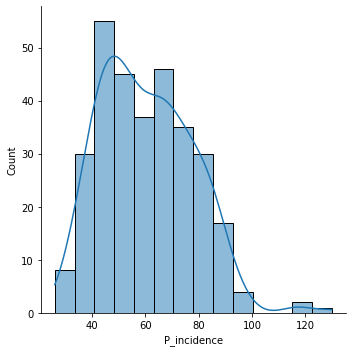

In [60]:
import seaborn as sns
sns.displot(df['P_incidence'],kde=True)

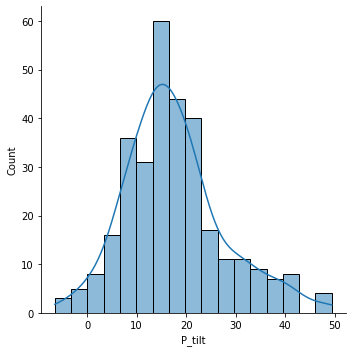

In [61]:
sns.displot(df['P_tilt'],kde=True)

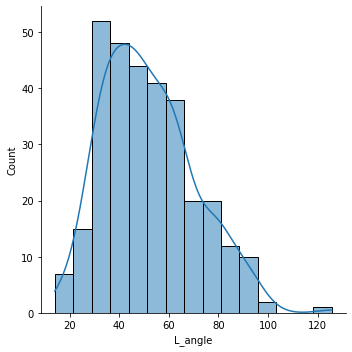

In [62]:
sns.displot(df['L_angle'],kde=True)

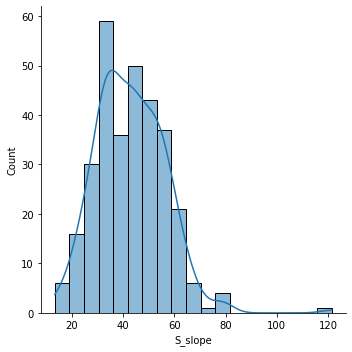

In [63]:
sns.displot(df['S_slope'],kde=True)

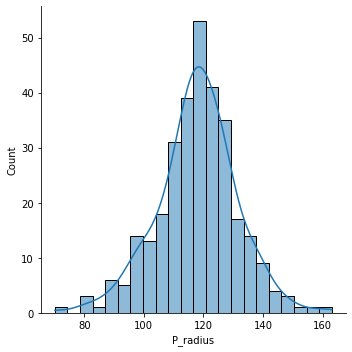

In [64]:
 sns.displot(df['P_radius'],kde=True)
    

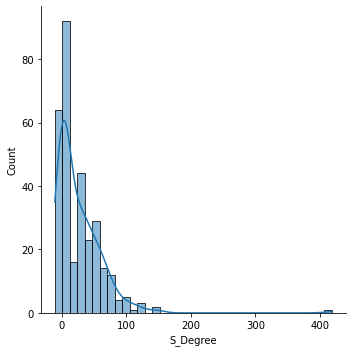

In [65]:
sns.displot(df['S_Degree'],kde=True)

we can see p_radius follows a normal distribution where mean and median are equal 

S_Degree is right-skewed clearly

<AxesSubplot:xlabel='Class', ylabel='count'>

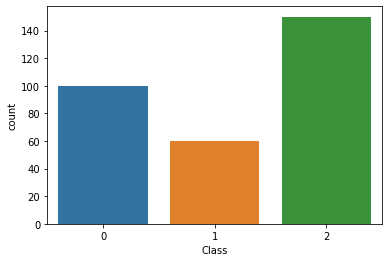

In [66]:
sns.countplot(x = df['Class'])

we can see that the classess are not equally distributed class2 is majority class

Bivariate and Multivariate Analysis

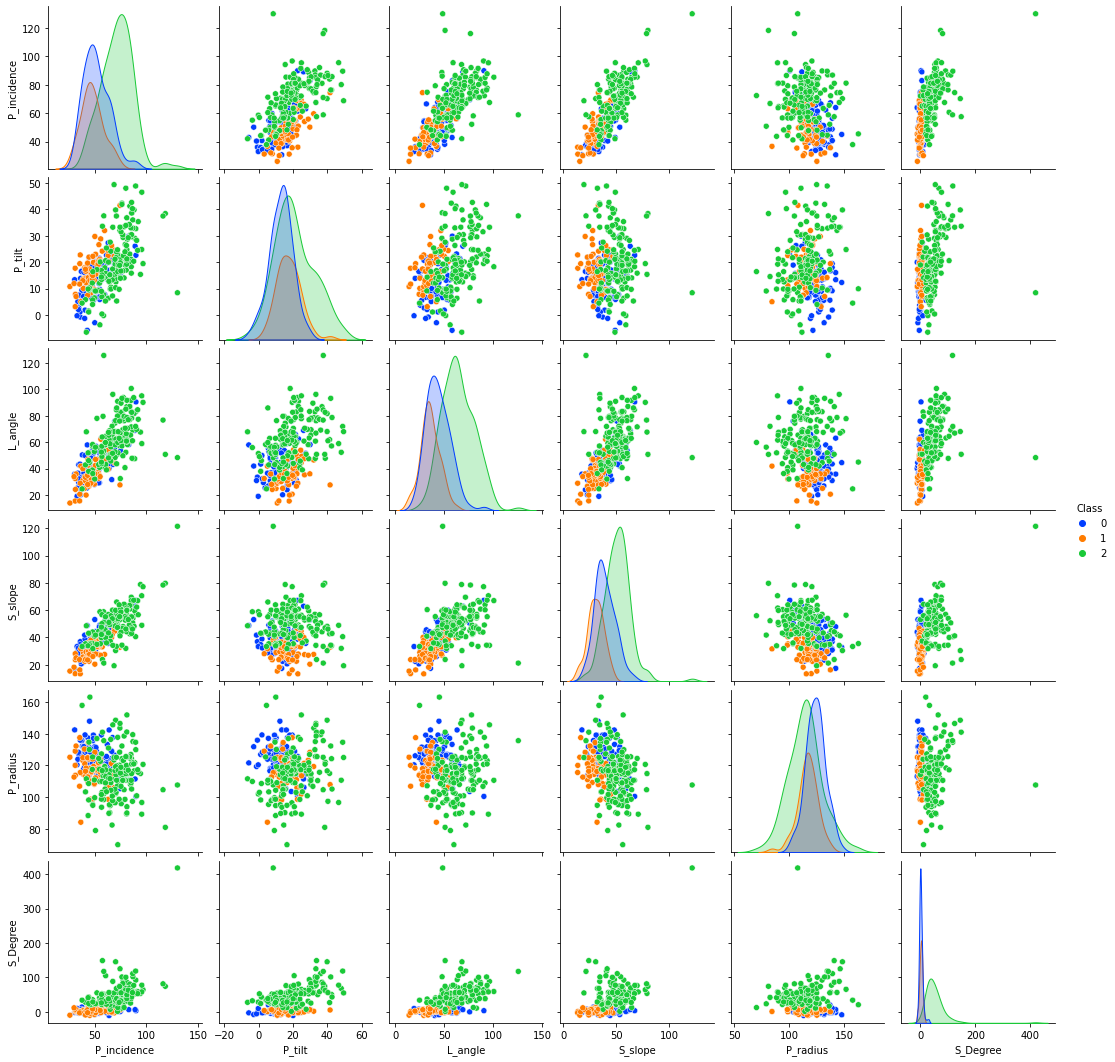

In [67]:
sns.pairplot(df, hue='Class',palette="bright")

we can see that classes are separated clearly.P_incedence and S_Degree are making the class2 apart.

<AxesSubplot:>

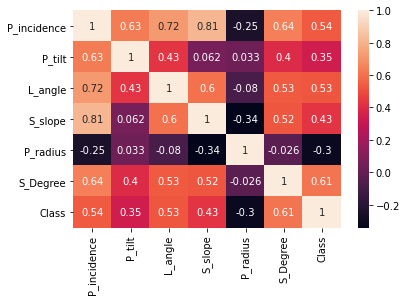

In [68]:
#visualizing correlation through heatmap
corr = df.corr()
sns.heatmap(corr, annot=True)

Any values greater than 0.5 or lessthan -0.5 are highly correlated

P_incidence is highly correlated with all other variables except P_radius 



P_radius is not correlated to any other variable except itself

4. Data pre-processing:


• Segregate predictors vs target attributes

In [69]:
X=df.drop('Class',axis=1) #predictor variables
Y=df['Class'] #target variable


• Perform normalisation or scaling if required.

In [70]:
#scaling the data for better accuracy
#since we are implementing KNN ,it is necessary to scale training set for better accuracy
from scipy.stats import zscore
XScaled =X.apply(zscore) #converting attributes to Z scale
XScaled.describe()


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,1.042177e-16,2.096889e-16,1.980495e-16,2.829278e-17,-5.071212e-16,-1.277204e-16
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01


• Check for target balancing. Add your comments.

In [71]:
#checking the distribution of  target variable in the data
Y.value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

here we can observe that the data is not distributed equally.Hence the data set is not balanced.

class 2 is of majority and remaining are minority classes which can be balanced using snote technique

imbalanced datasets reduce the accuracy of model.the accuracy of model is better with a balanced dataset over imbalanced dataset

we have already visualized distribution of target variable using count plot earlier

if dataset is imbalanced it can be balanced by implementing following code

In [72]:
#from imblearn.over_sampling import SMOTE 
#from collections import Counter
#Oversample =SMOTE() 
#X_sm,Y_sm=Oversample.fit_resample(X_train,Y_train)
#counter =Counter(Y_sm) 
#print(counter)

• Perform train-test split.


In [73]:
#performing train test split in ratio of 70:30 respectively
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(217, 6) (93, 6) (217,) (93,)


5. Model training, testing and tuning:



• Design and train a KNN classifier.


train set score with is : 0.8940092165898618
accuracy of test data : 0.7741935483870968

              precision    recall  f1-score   support

           0       0.70      0.57      0.63        28
           1       0.46      0.67      0.55        18
           2       1.00      0.94      0.97        47

    accuracy                           0.77        93
   macro avg       0.72      0.72      0.71        93
weighted avg       0.80      0.77      0.78        93


Confusion Matrix
 [[16 12  0]
 [ 6 12  0]
 [ 1  2 44]]


<AxesSubplot:>

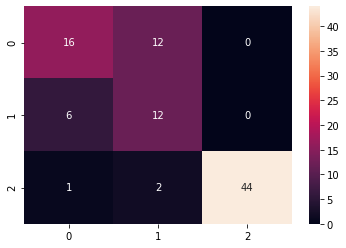

In [82]:
#KNN   without scaling
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)
knn_model =KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
y_predicted = knn_model.predict(X_test)
score_train = knn_model.score(X_train,Y_train)
score_test = knn_model.score(X_test,Y_test)
print("train set score with is :", score_train)

#displaying classification accuracies
test_accuracy = accuracy_score(Y_test, y_predicted)
print("accuracy of test data :",test_accuracy)

#classification report
class_rep =classification_report(Y_test,y_predicted)
print('\n{}'.format(class_rep))

#confusion matrix
cm =confusion_matrix(Y_test,y_predicted)
print('\nConfusion Matrix\n',cm)
sns.heatmap(cm, annot=True)


(217, 6) (93, 6) (217,) (93,)
train set score with is : 0.8525345622119815
accuracy of test data : 0.7849462365591398

              precision    recall  f1-score   support

           0       0.69      0.64      0.67        28
           1       0.58      0.83      0.68        18
           2       0.98      0.85      0.91        47

    accuracy                           0.78        93
   macro avg       0.75      0.78      0.75        93
weighted avg       0.81      0.78      0.79        93


Confusion Matrix
 [[18  9  1]
 [ 3 15  0]
 [ 5  2 40]]


<AxesSubplot:>

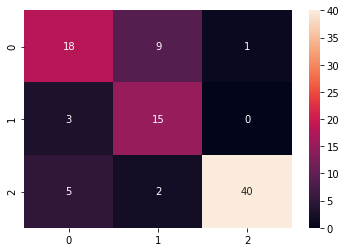

In [90]:
#KNN with scaling
X_train,X_test,Y_train,Y_test=train_test_split(XScaled,Y,test_size=0.3,random_state=10)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
knn_model =KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
y_predicted = knn_model.predict(X_test)
score_train = knn_model.score(X_train,Y_train)
score_test = knn_model.score(X_test,Y_test)
print("train set score with is :", score_train)

#displaying classification accuracies
test_accuracy = accuracy_score(Y_test, y_predicted)
print("accuracy of test data :",test_accuracy)

#classification report
class_rep =classification_report(Y_test,y_predicted)
print('\n{}'.format(class_rep))

#confusion matrix
cm =confusion_matrix(Y_test,y_predicted)
print('\nConfusion Matrix\n',cm)
sns.heatmap(cm, annot=True)


Automate the task of finding best values of K for KNN.

In [91]:
#finding best value of k
scores =[]# creating a list for storing scores
for k in range(1,20) :#loop using for loop through given range
    knn_model =KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, Y_train)
    scores.append( knn_model.score(X_test,Y_test))# append all the scores obtained to scores list created
    

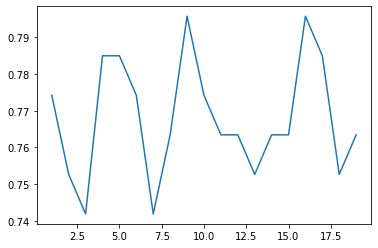

In [92]:
plt.plot(range(1,20),scores)# visualization of scores

Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained
model with your comments for selecting this model. 

In [97]:
#finding best hyper parameter set for KNN using grid search

from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 'weights' : ['uniform', 'distance'],
              }
knn =KNeighborsClassifier()
Grid_search = GridSearchCV(KNeighborsClassifier(),parameters)
Grid_search.fit(X_train,Y_train)
Grid_search.best_params_





          
              
    


{'n_neighbors': 3, 'weights': 'distance'}

(217, 6) (93, 6) (217,) (93,)
accuracy of test data : 0.8064516129032258

              precision    recall  f1-score   support

           0       0.76      0.57      0.65        28
           1       0.54      0.78      0.64        18
           2       0.98      0.96      0.97        47

    accuracy                           0.81        93
   macro avg       0.76      0.77      0.75        93
weighted avg       0.83      0.81      0.81        93


Confusion Matrix
 [[16 11  1]
 [ 4 14  0]
 [ 1  1 45]]


<AxesSubplot:>

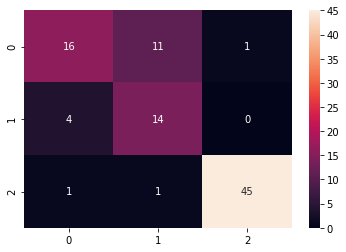

In [98]:

#implement KNN with hyper parameter tuning 

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
knn_model =KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_model.fit(X_train, Y_train)
y_predicted = knn_model.predict(X_test)

#displaying classification accuracies
test_accuracy = accuracy_score(Y_test, y_predicted)
print("accuracy of test data :",test_accuracy)

#classification report
class_rep =classification_report(Y_test,y_predicted)
print('\n{}'.format(class_rep))

#confusion matrix
cm =confusion_matrix(Y_test,y_predicted)
print('\nConfusion Matrix\n',cm)
sns.heatmap(cm, annot=True)




In [88]:
from imblearn.over_sampling import SMOTE 
from collections import Counter
sm =SMOTE(sampling_strategy='minority') 
X_sm,Y_sm=sm.fit_resample(X_train,Y_train)
counter =Counter(Y_sm) 
print(counter)

Counter({2: 103, 1: 103, 0: 72})


train set score with is : 0.8969072164948454
accuracy of test data : 0.8928571428571429

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        17
           1       0.88      0.88      0.88        33
           2       0.97      1.00      0.99        34

    accuracy                           0.89        84
   macro avg       0.87      0.86      0.86        84
weighted avg       0.89      0.89      0.89        84


Confusion Matrix
 [[12  4  1]
 [ 4 29  0]
 [ 0  0 34]]


<AxesSubplot:>

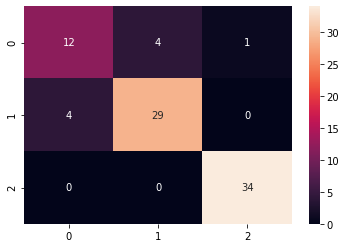

In [96]:
 # KNN for with  over sampling 
from sklearn.neighbors import KNeighborsClassifier
from sklearn. metrics import classification_report,confusion_matrix,accuracy_score
X_train,X_test,Y_train,Y_test=train_test_split(X_sm,Y_sm,test_size=0.3,random_state=1)
knn_model =KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
y_predicted = knn_model.predict(X_test)
score_train = knn_model.score(X_train,Y_train)
score_test = knn_model.score(X_test,Y_test)
print("train set score with is :", score_train)


#displaying classification accuracies
test_accuracy = accuracy_score(Y_test, y_predicted)
print("accuracy of test data :",test_accuracy)

#classification report
class_rep =classification_report(Y_test,y_predicted)
print('\n{}'.format(class_rep))
#confusion matrix

cm =confusion_matrix(Y_test,y_predicted)
print('\nConfusion Matrix\n',cm)
sns.heatmap(cm, annot=True)


• Write your conclusion on the results and  suggestions if any

1.we can see that the accuracy of model using KNN when scaling is not applied is 77.4

2.accuracy increased to  79 after scaling we can see scaling made accuracy of model better we can see 2% change in accuracy

3.sampling is done to balance data set which increased accuracy to 89.2% a major change in accuracy due to balance in data

4..hypertuning that is implemented on unbalanced data set increased accuracy of model to 81% a change of  2% in accuracy compared to scaling


class 0 represents normal class , we consider data under other two classes having some health issue as abnormal


we can see only 32% are normal where as remaining 68% are abnormal with some health issue i.e type-h or type-s

 metrics of classification report :

precision :when positive result is predicted how much is it true

recall : when the result is actually positive how often it is predicted correctly

In our project precision tell us about patients who are not normal but predicted as normal


 recall tell us patients who are normal but predicted Abnormal

in our case precision and recall would have  equal importance

so  we need to choose model with good f1-score as it is mean of two and better accuracy
here in my project i have selected KNN with hyper tuning is best model as it has good f1-score along with better accuracy of 81%


it would be better if dataset was balanced in prior